In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import numpy as np

In [6]:
df=pd.read_csv('/content/drive/MyDrive/clustering/All data clustering/clustering data 1/CC GENERAL.csv')

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
df_1=df[[ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [9]:
df_1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
df_1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
df_1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# check duplicate values
duplicate = df_1[df_1.duplicated()]
duplicate

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


## Dataset info
CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user



# Data Distrubution 

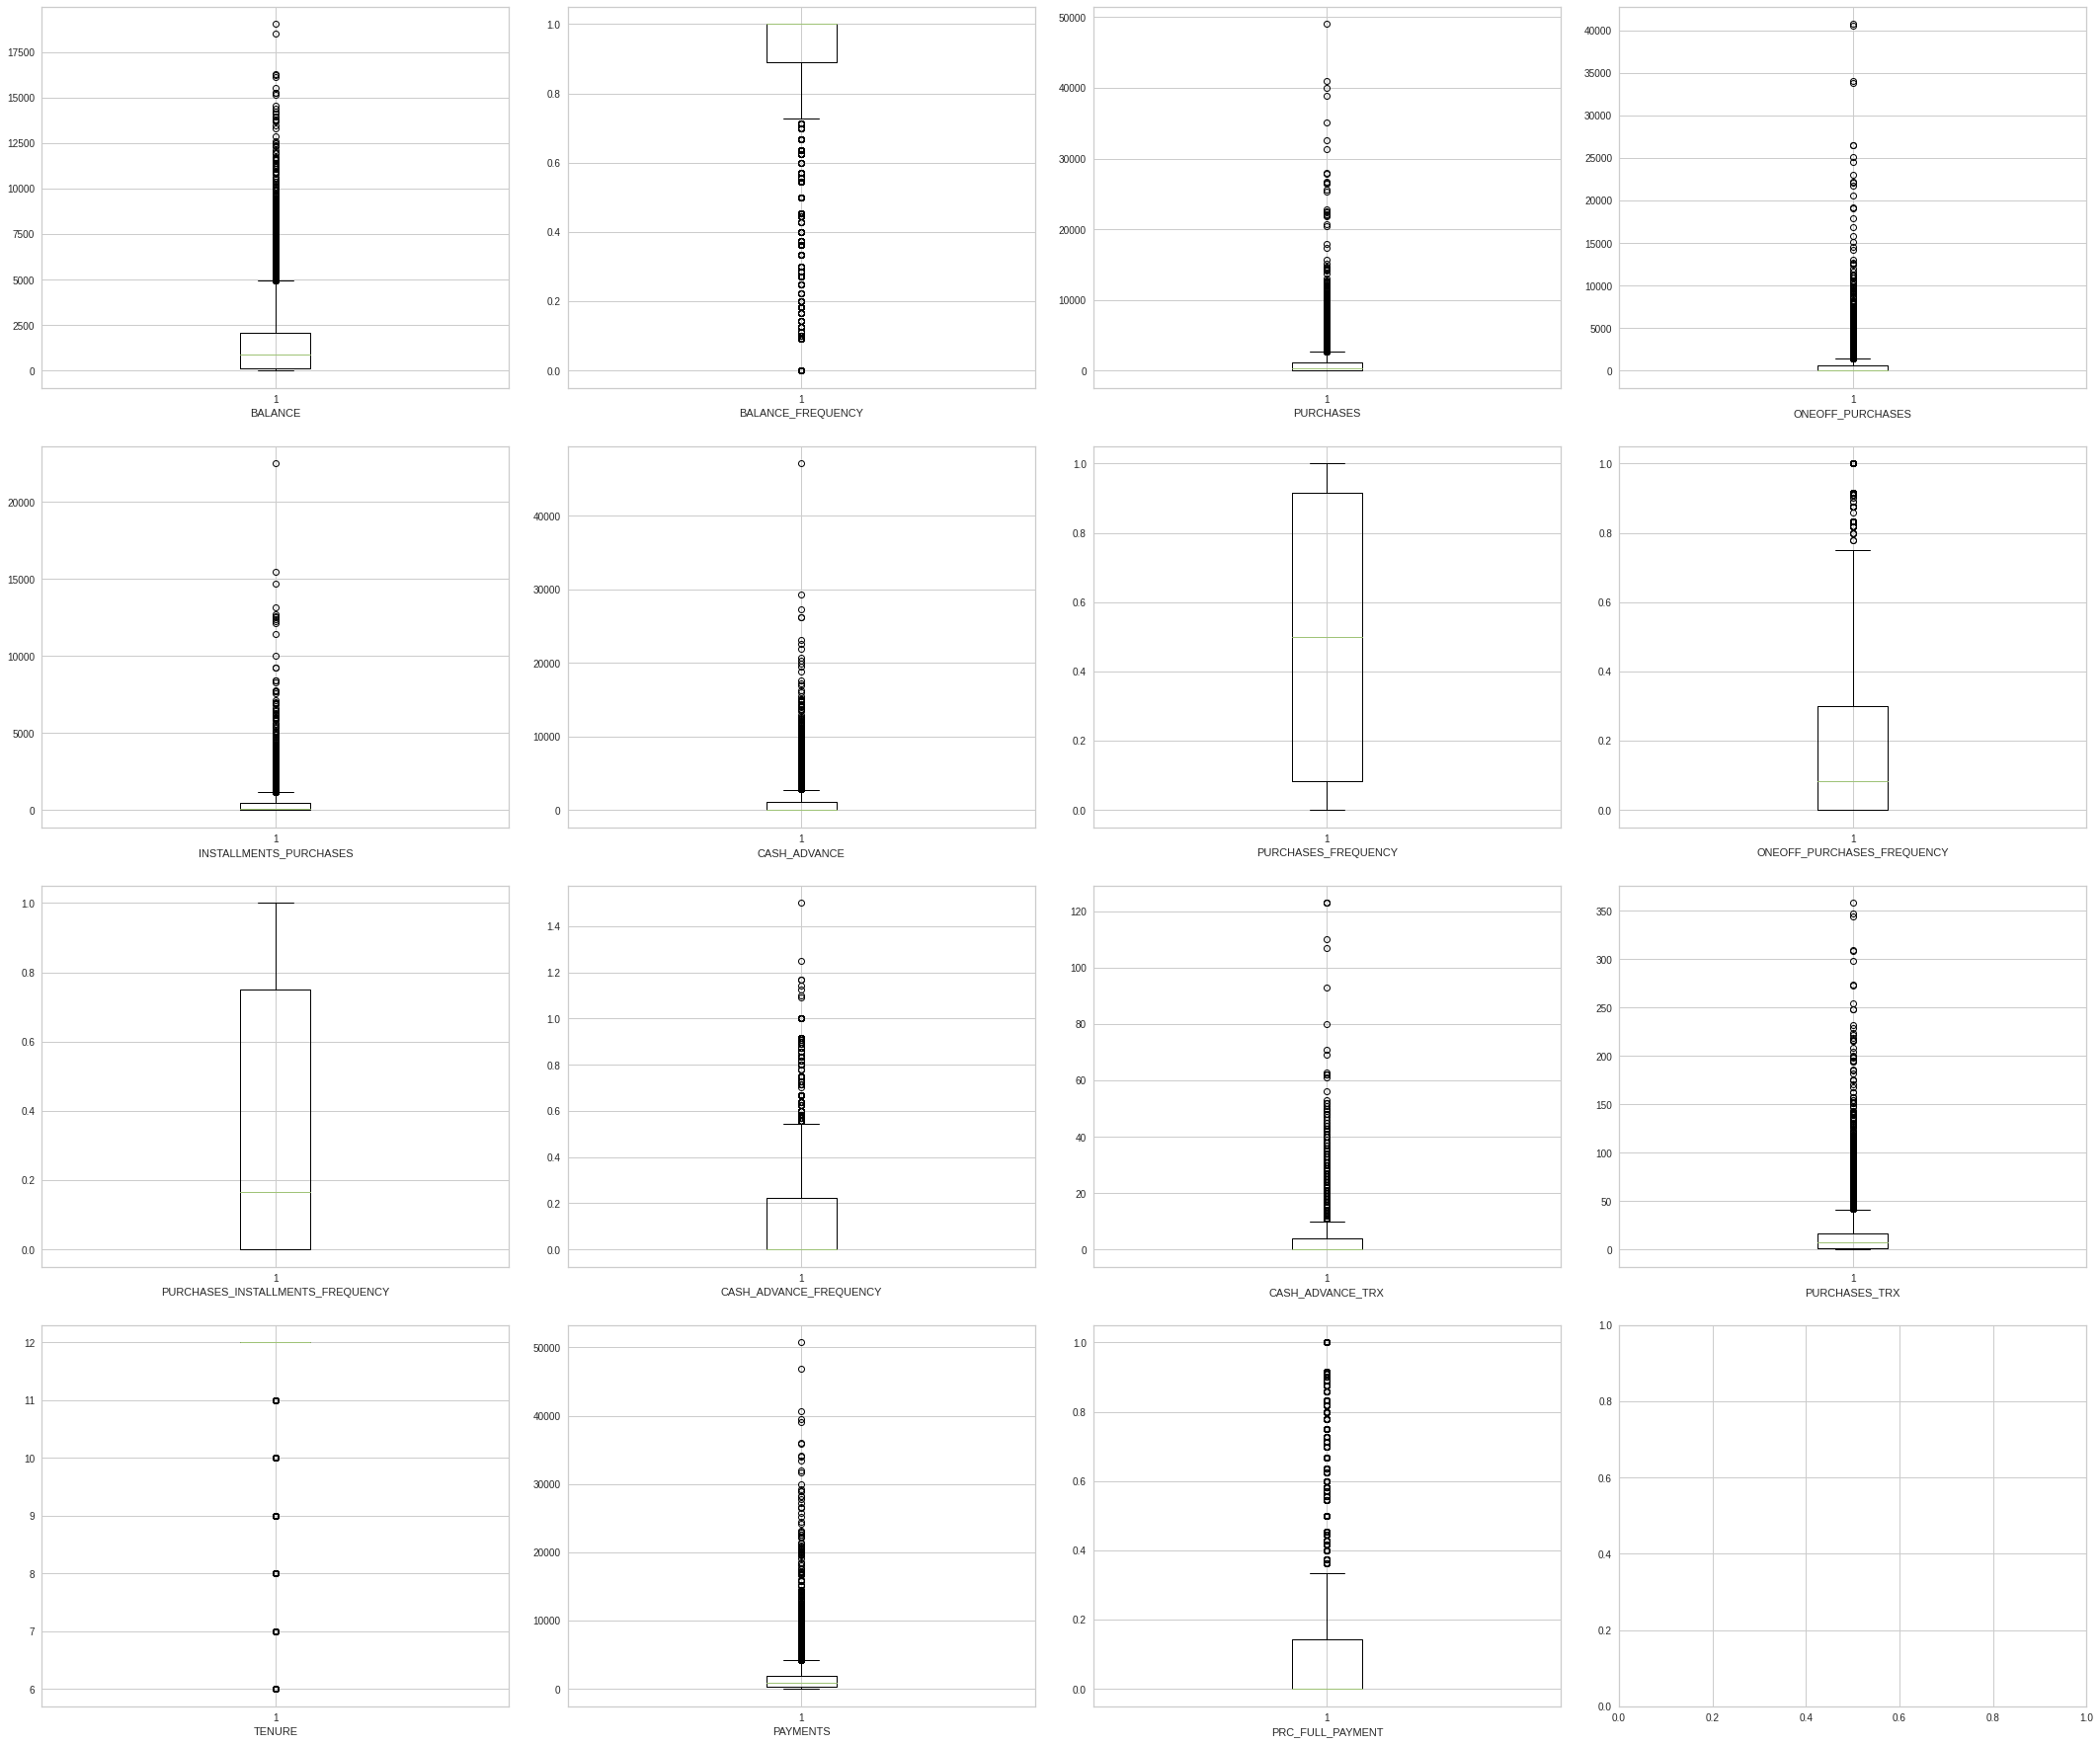

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(30, 25))
# Use the axes for plotting
axes[0,0].boxplot(df_1['BALANCE'])
axes[0,0].set_xlabel('BALANCE')
axes[0,1].boxplot(df_1['BALANCE_FREQUENCY'])
axes[0,1].set_xlabel('BALANCE_FREQUENCY')
axes[0,2].boxplot(df_1['PURCHASES'])
axes[0,2].set_xlabel('PURCHASES')
axes[0,3].boxplot(df_1['ONEOFF_PURCHASES'])
axes[0,3].set_xlabel('ONEOFF_PURCHASES')
axes[1,0].boxplot(df_1['INSTALLMENTS_PURCHASES'])
axes[1,0].set_xlabel('INSTALLMENTS_PURCHASES')
axes[1,1].boxplot(df_1['CASH_ADVANCE'])
axes[1,1].set_xlabel('CASH_ADVANCE')
axes[1,2].boxplot(df_1['PURCHASES_FREQUENCY'])
axes[1,2].set_xlabel('PURCHASES_FREQUENCY')
axes[1,3].boxplot(df_1['ONEOFF_PURCHASES_FREQUENCY'])
axes[1,3].set_xlabel('ONEOFF_PURCHASES_FREQUENCY')
axes[2,0].boxplot(df_1['PURCHASES_INSTALLMENTS_FREQUENCY'])
axes[2,0].set_xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
axes[2,1].boxplot(df_1['CASH_ADVANCE_FREQUENCY'])
axes[2,1].set_xlabel('CASH_ADVANCE_FREQUENCY')
axes[2,2].boxplot(df_1['CASH_ADVANCE_TRX'])
axes[2,2].set_xlabel('CASH_ADVANCE_TRX')
axes[2,3].boxplot(df_1['PURCHASES_TRX'])
axes[2,3].set_xlabel('PURCHASES_TRX')
axes[3,0].boxplot(df_1['TENURE'])
axes[3,0].set_xlabel('TENURE')
axes[3,1].boxplot(df_1['PAYMENTS'])
axes[3,1].set_xlabel('PAYMENTS')
axes[3,2].boxplot(df_1['PRC_FULL_PAYMENT'])
axes[3,2].set_xlabel('PRC_FULL_PAYMENT')
plt.tight_layout(pad=2);

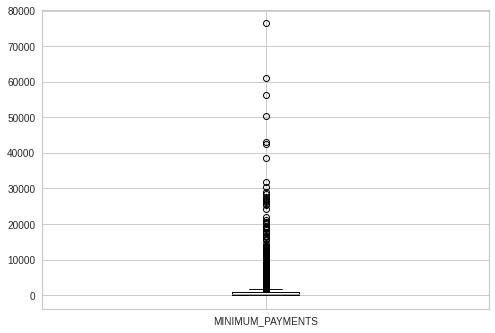

In [15]:
figure=df_1.boxplot(column='MINIMUM_PAYMENTS')

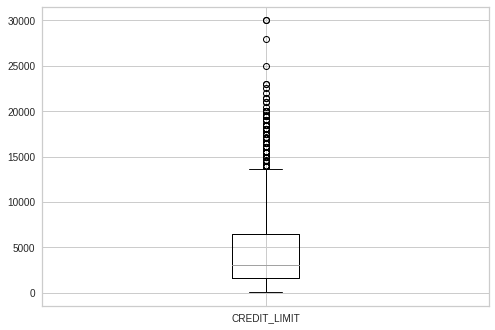

In [ ]:
figure=df_1.boxplot(column='CREDIT_LIMIT')

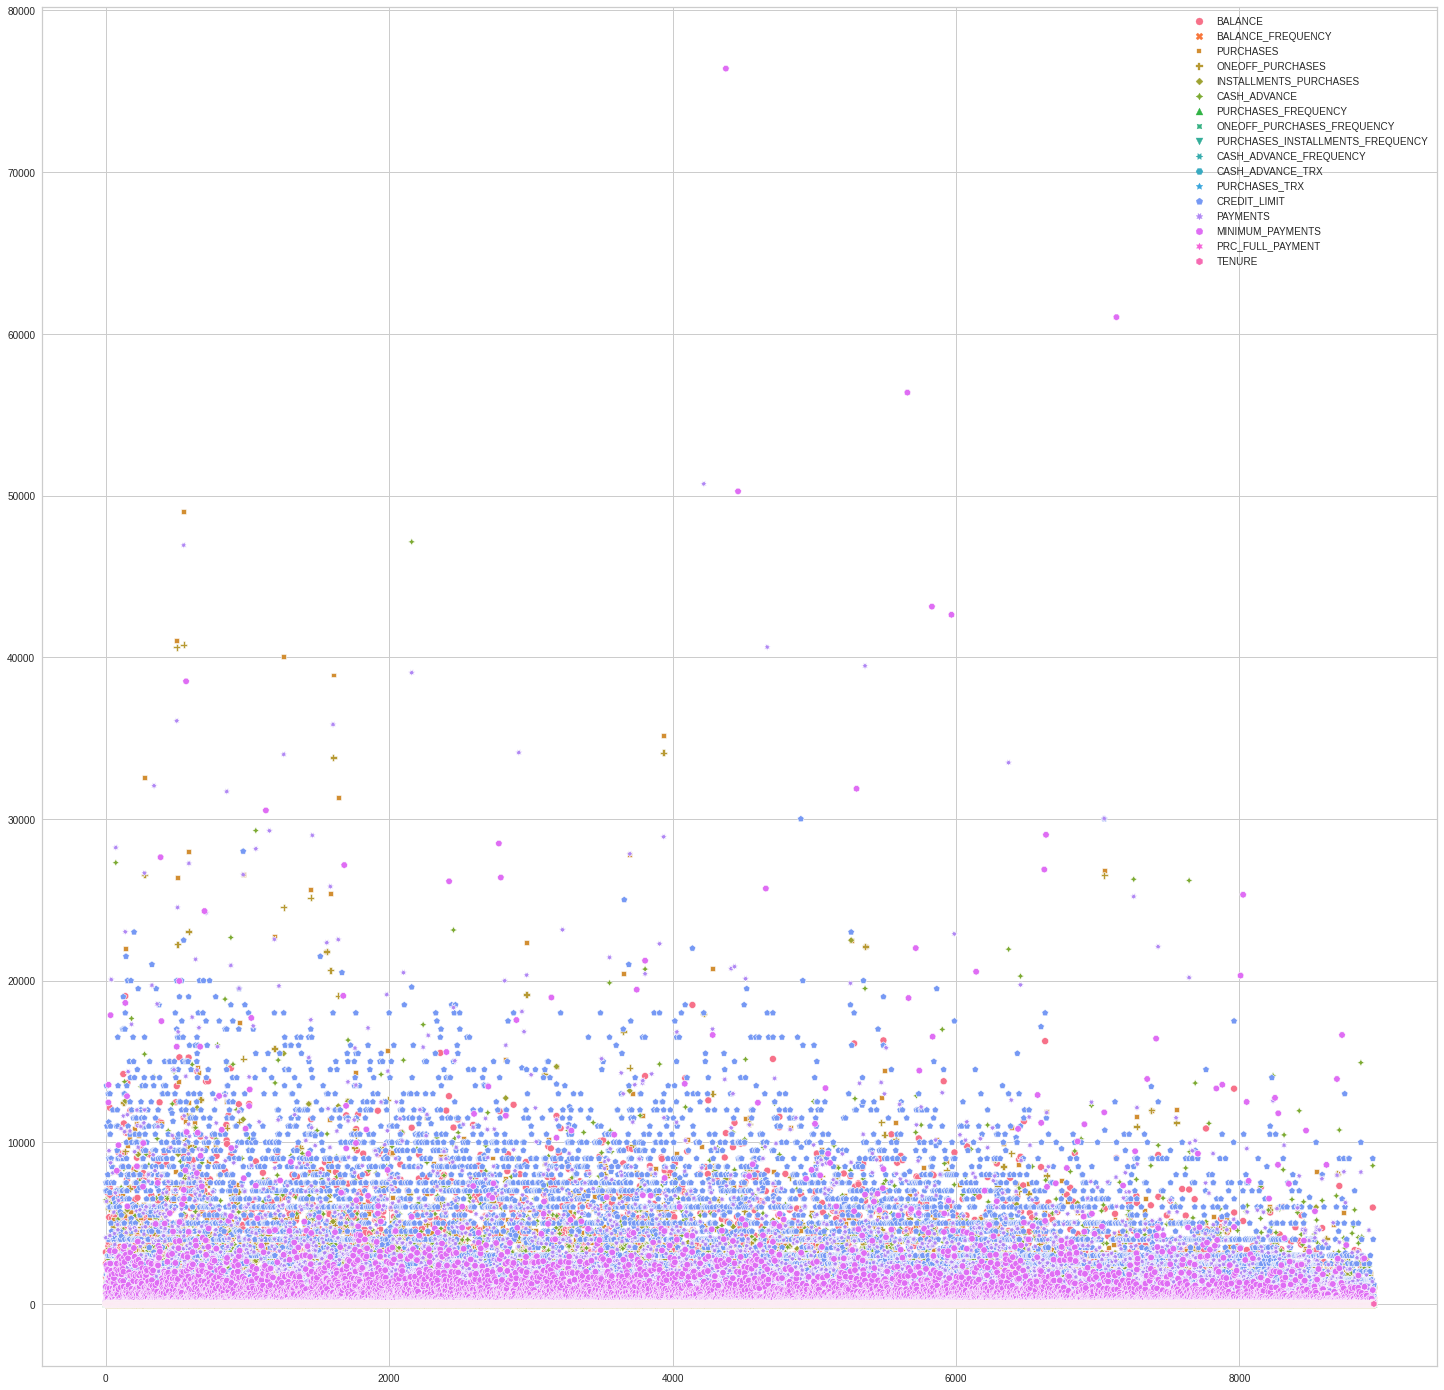

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data = df_1)
plt.show()

<Figure size 3600x3600 with 0 Axes>

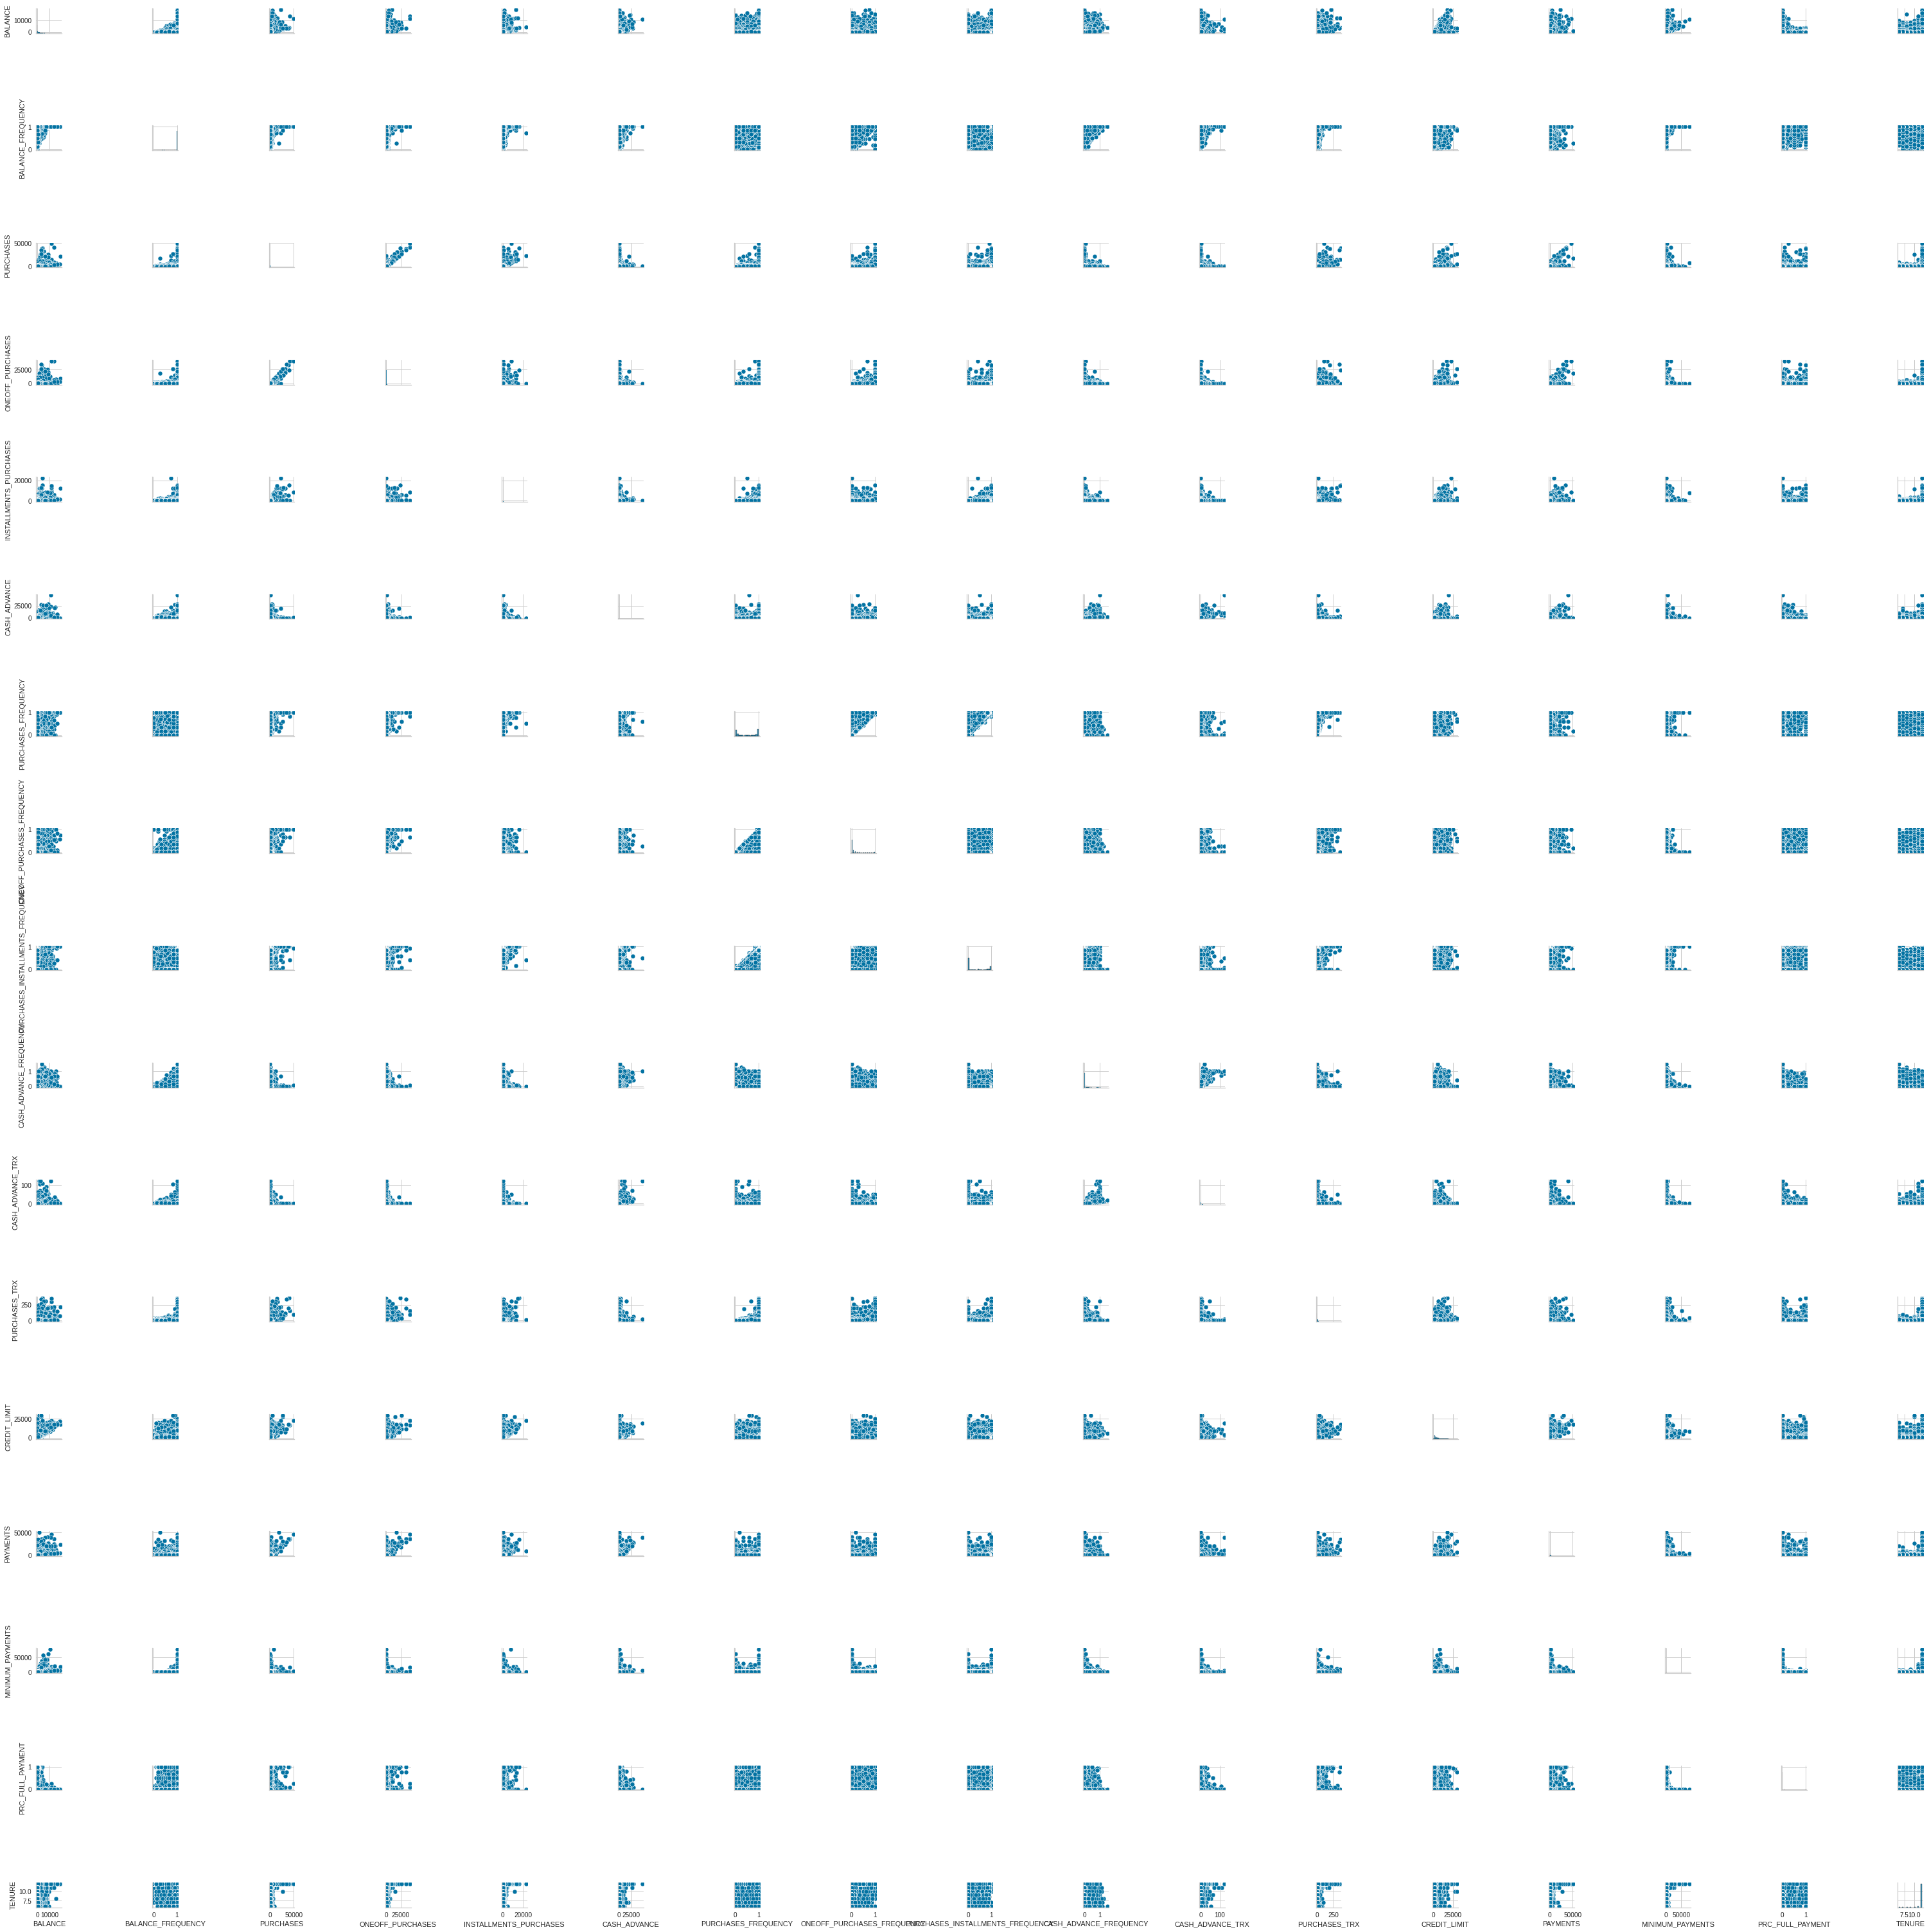

In [ ]:
plt.figure(figsize=(50,50))
sns.pairplot(df_1)

## Features corelation

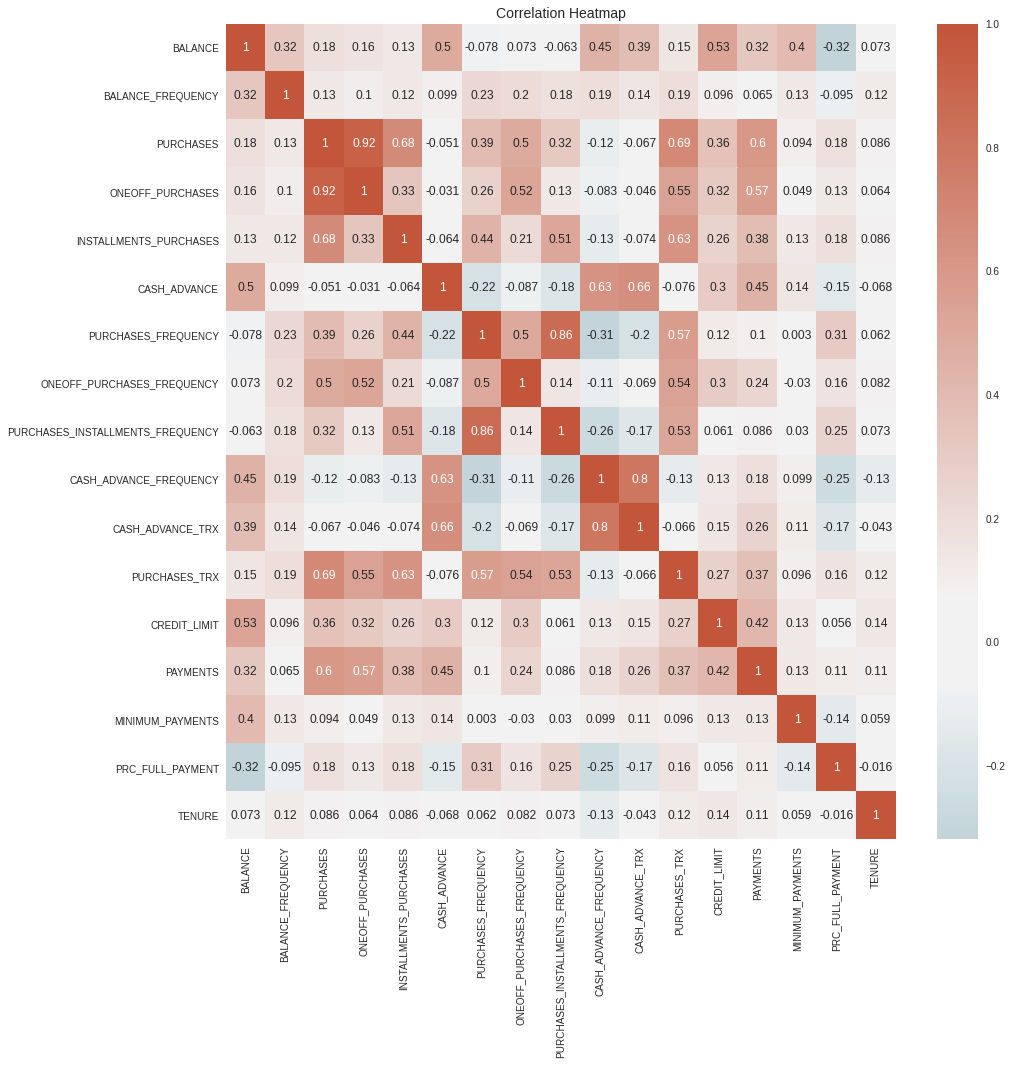

In [ ]:
df_core=df_1
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(df_core.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

## Outlier detection

### Using IQR

In [16]:
def outlier_percent(df_1):
    Q1 = df_1.quantile(0.25)
    Q3 = df_1.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    print('Lower bound',minimum )
    print('Upper bound',maximum )
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = df_1.count()
    return (num_outliers/num_total)*100

In [17]:
for column in df_1.columns:
    data = df_1[column]
    percent = str(round(outlier_percent(data), 2))
    print(f'Outliers in "{column}": {percent}%')

Lower bound -2760.5052645
Upper bound 4942.9272155
Outliers in "BALANCE": 7.77%
Lower bound 0.7222224999999998
Upper bound 1.1666665
Outliers in "BALANCE_FREQUENCY": 16.68%
Lower bound -1566.1075000000003
Upper bound 2715.8725000000004
Outliers in "PURCHASES": 9.03%
Lower bound -866.1075000000001
Upper bound 1443.5125000000003
Outliers in "ONEOFF_PURCHASES": 11.32%
Lower bound -702.95625
Upper bound 1171.59375
Outliers in "INSTALLMENTS_PURCHASES": 9.69%
Lower bound -1670.7317088749996
Upper bound 2784.5528481249994
Outliers in "CASH_ADVANCE": 11.51%
Lower bound -1.166668
Upper bound 2.166668
Outliers in "PURCHASES_FREQUENCY": 0.0%
Lower bound -0.44999999999999996
Upper bound 0.75
Outliers in "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Lower bound -1.125
Upper bound 1.875
Outliers in "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Lower bound -0.333333
Upper bound 0.555555
Outliers in "CASH_ADVANCE_FREQUENCY": 5.87%
Lower bound -6.0
Upper bound 10.0
Outliers in "CASH_ADVANCE_TRX": 8.98%
Lower bound -2

## Remove outlier

In [18]:
df_2=df_1.copy()

In [19]:
for column in df_2.columns:
    data = df_2[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    outliers = ((data < minimum) |(data > maximum))
    df_2[column].loc[outliers] = np.nan

In [20]:
df_2.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [21]:
df_2.head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,NaN,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,NaN,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,NaN,1499.00,NaN,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
5,1809.828751,1.000000,1333.28,0.00,NaN,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,NaN,0.000000,12.0
6,627.260806,1.000000,NaN,NaN,688.38,0.000000,1.000000,NaN,1.000000,0.000000,0.0,NaN,13500.0,NaN,198.065894,NaN,12.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0
9,152.225975,NaN,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0


## KNN imputer (Handle missing values)

In [22]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(df_2), columns=df_2.columns)
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [23]:
imp_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.000,0.00,1068.127248,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.170,0.00,0.000000,1.000000,0.650000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.981818,1499.00,309.918,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,1112.028902,0.000000,12.0
4,817.714335,1.000000,16.00,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.016667,12.0
8946,19.183215,1.000000,300.00,0.000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,705.446747,0.000000,12.0
8947,23.398673,0.833333,144.40,0.000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,12.0
8948,13.457564,0.833333,0.00,0.000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,12.0


#### Normalized the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
std_imp_data = pd.DataFrame(StandardScaler().fit_transform(imp_data), columns=imp_data.columns)
std_imp_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,1.459292e-16,3.641780e-15,-3.845664e-15,8.330072e-15,9.068103e-16,8.933760e-16,-3.716084e-16,-7.758809e-15,2.353921e-16,-9.233334e-16,-7.427330e-17,9.962980e-16,4.909878e-15,4.842805e-16,-2.008573e-16,-2.921344e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.711973e-01,-4.155613e+00,-9.108875e-01,-6.679045e-01,-7.876755e-01,-6.489418e-01,-1.221758e+00,-7.446281e-01,-9.169952e-01,-7.472686e-01,-6.819606e-01,-9.664084e-01,-1.365191e+00,-1.191542e+00,-1.158882e+00,-4.495377e-01,0.0
25%,-8.704482e-01,3.667368e-01,-8.520982e-01,-6.679045e-01,-7.876755e-01,-6.489418e-01,-1.014125e+00,-7.446281e-01,-9.169952e-01,-7.472686e-01,-6.819606e-01,-8.736091e-01,-8.652204e-01,-8.088997e-01,-7.803523e-01,-4.495377e-01,0.0
50%,-2.883274e-01,3.667368e-01,-3.757635e-01,-5.868463e-01,-4.754304e-01,-6.489418e-01,2.404259e-02,-3.780223e-01,-4.976286e-01,-7.472686e-01,-6.819606e-01,-3.168136e-01,-4.136338e-01,-3.375007e-01,-4.237788e-01,-4.495377e-01,0.0
75%,5.646491e-01,3.667368e-01,6.126365e-01,3.671317e-01,5.319986e-01,5.416827e-01,1.062211e+00,4.485112e-01,9.701506e-01,4.368733e-01,4.783950e-01,6.111790e-01,6.508204e-01,6.738027e-01,6.386496e-01,-2.118108e-01,0.0
max,2.911266e+00,3.667368e-01,3.120231e+00,3.512681e+00,3.318839e+00,3.337571e+00,1.269843e+00,2.554838e+00,1.599199e+00,3.128100e+00,3.185891e+00,2.838361e+00,3.005522e+00,2.978873e+00,2.852750e+00,4.305014e+00,0.0


# Project 1: Without Reducing the Dimention of data

Elbow method for determining the cluster number

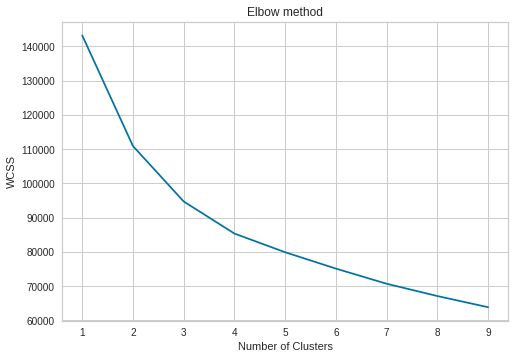

In [26]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(std_imp_data) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()       # Fit the data to the visualizer

In [27]:
km_model = KMeans(4)
labels = km_model.fit_predict(std_imp_data)

## Model Evaluation

In [28]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
print(f'Davies-Bouldin index = {davies_bouldin_score(std_imp_data, labels)}')
print(f'Silhouette Score = {silhouette_score(std_imp_data, labels)}')

Davies-Bouldin index = 1.6876250800863963
Silhouette Score = 0.17429162226134656


In [ ]:
clusters_all_data=pd.concat([df_1, pd.DataFrame({'cluster':labels})], axis=1)
clusters_all_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5,8
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,1


# Clusters analysis

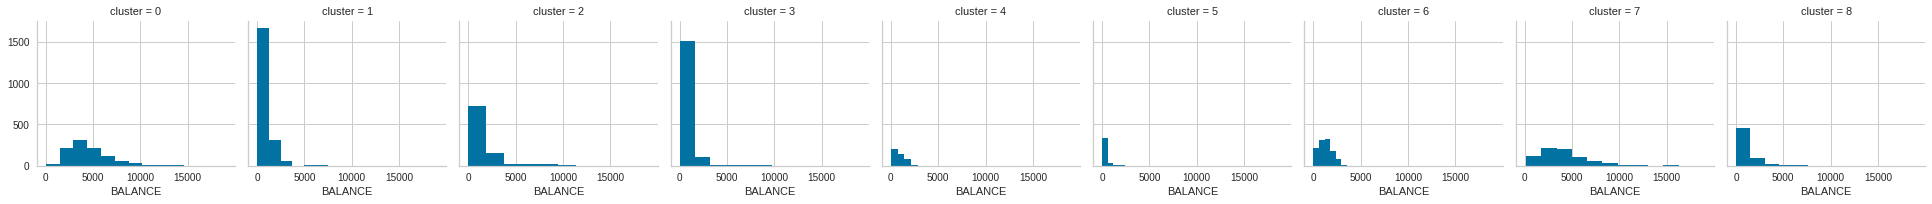

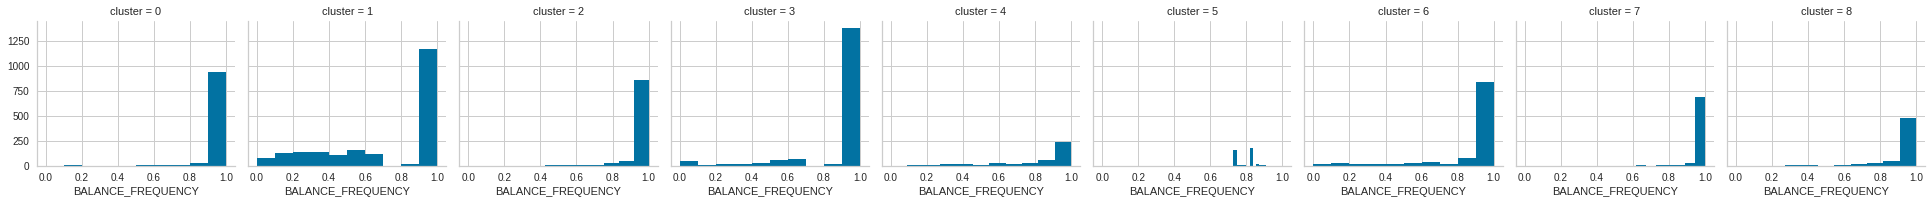

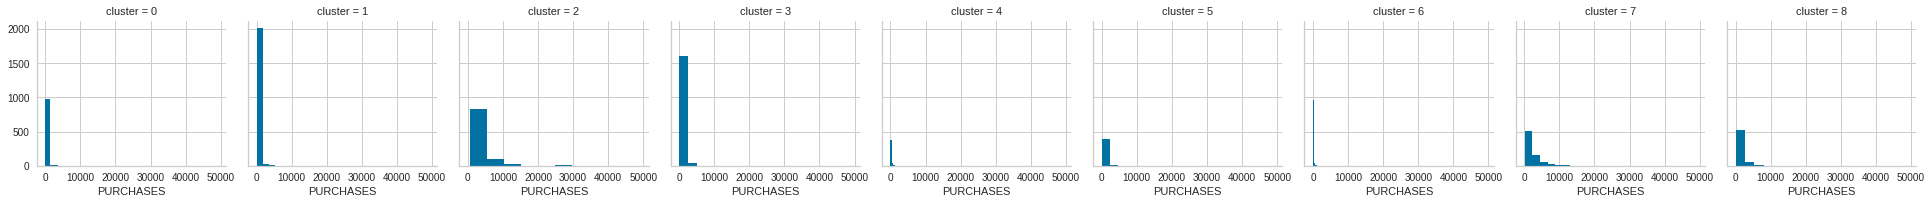

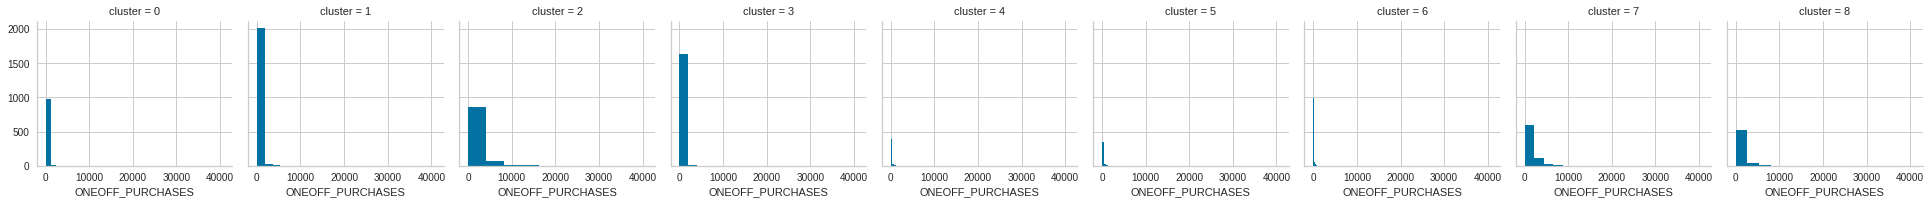

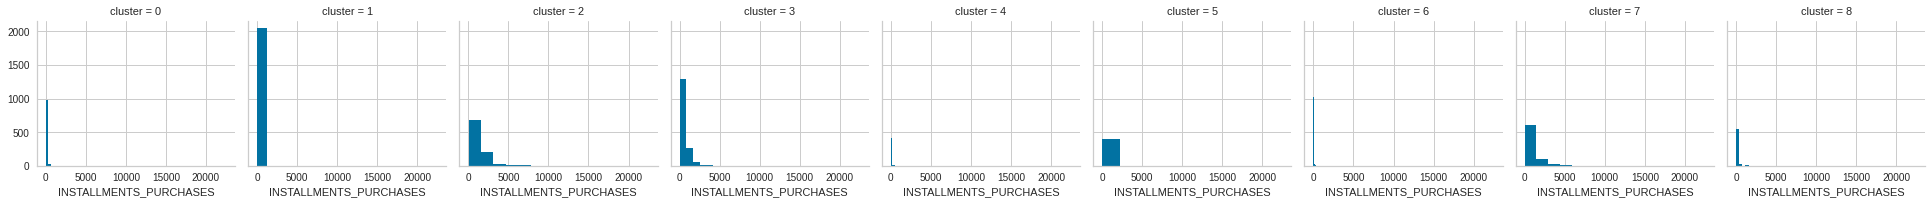

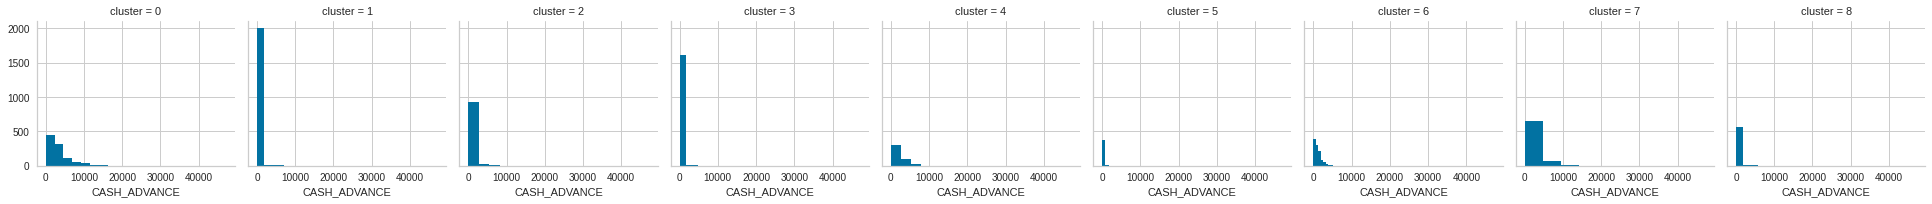

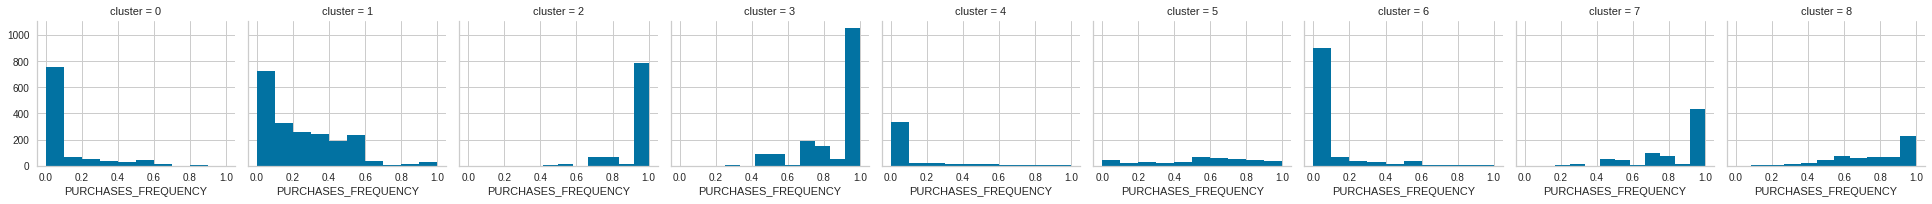

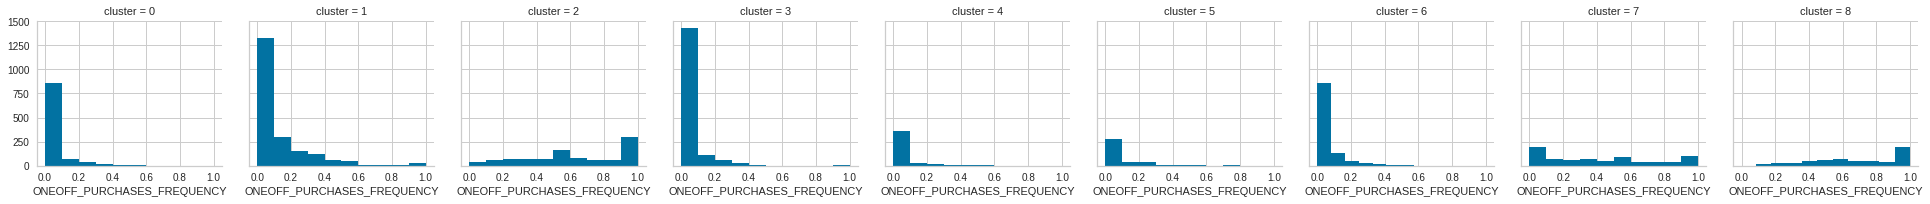

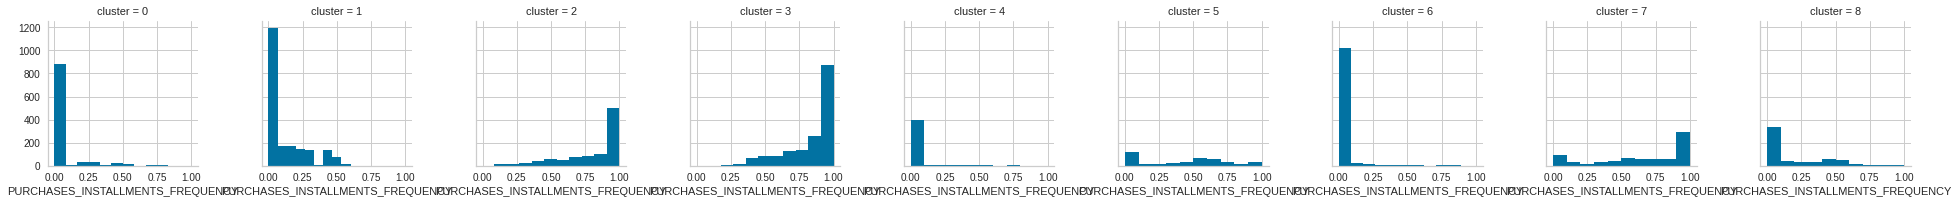

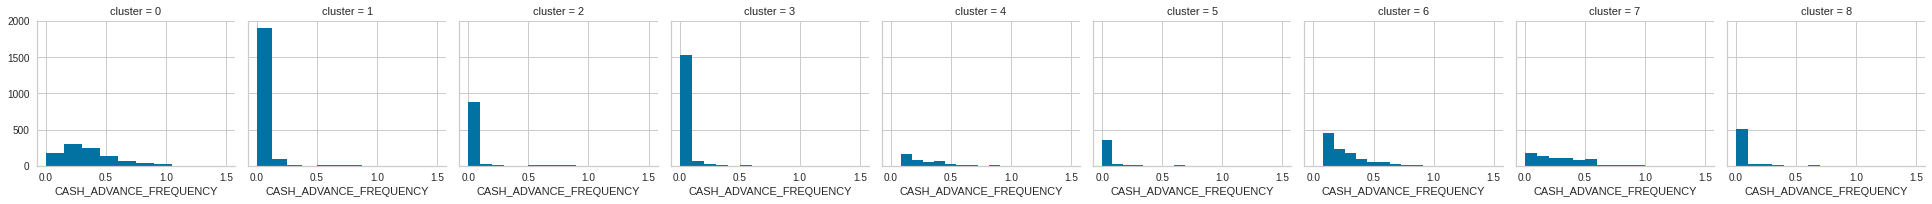

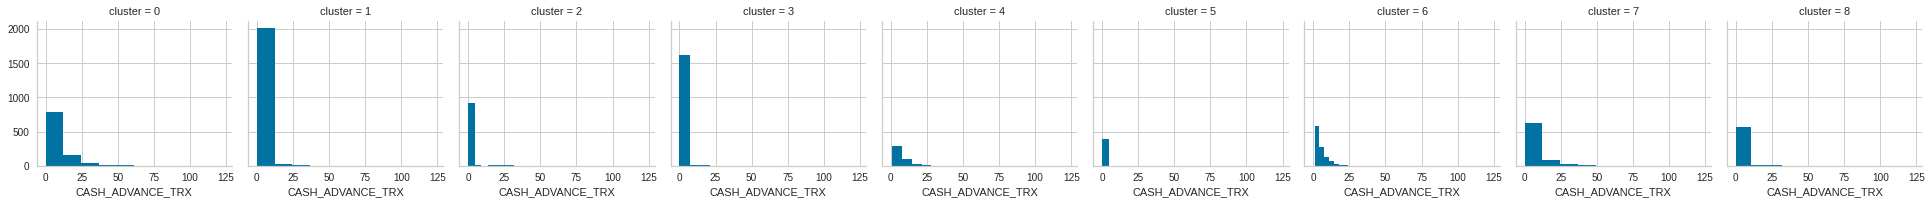

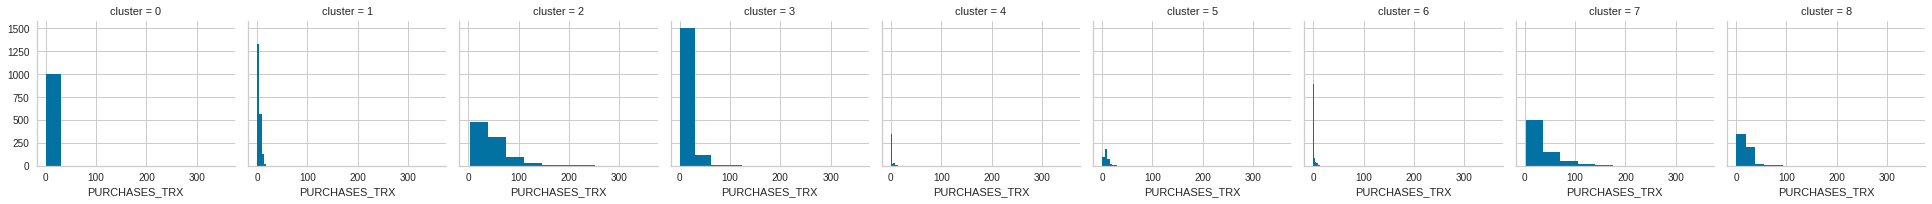

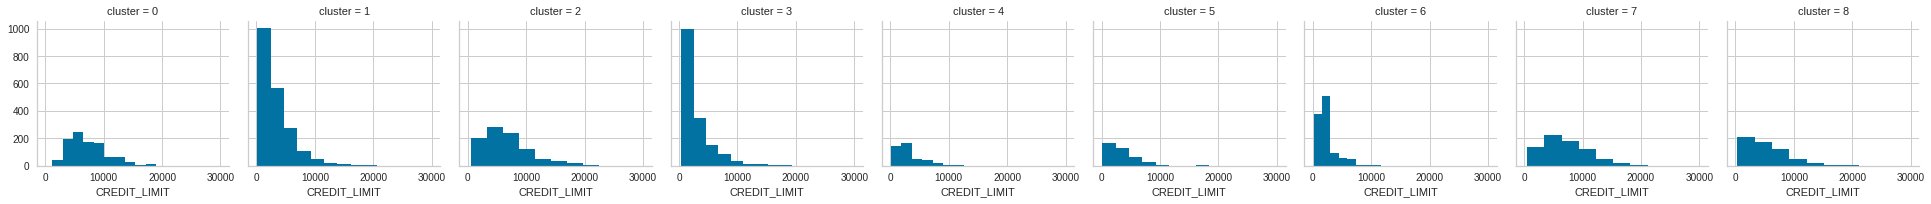

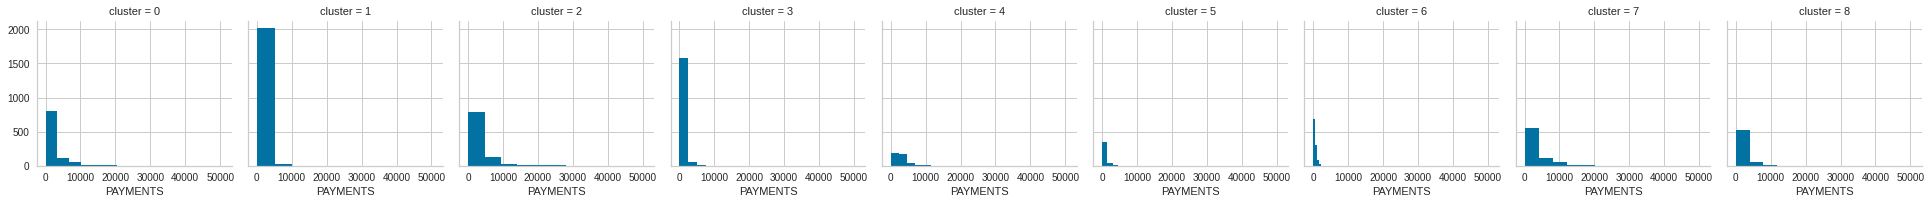

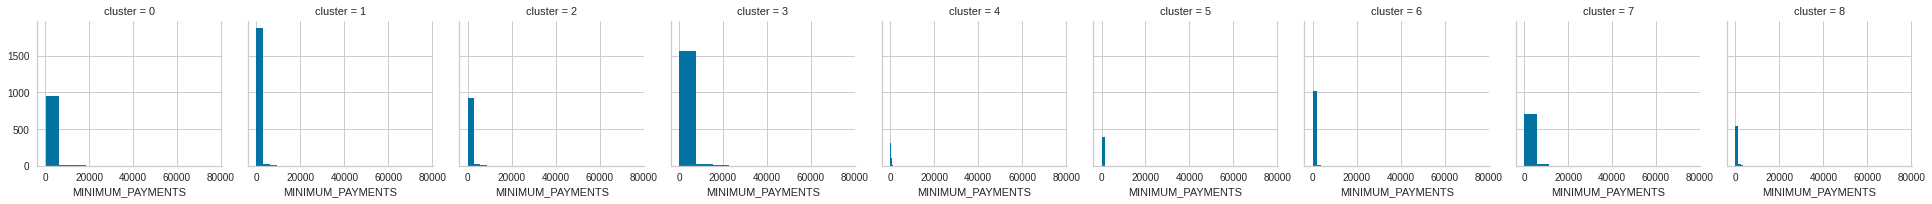

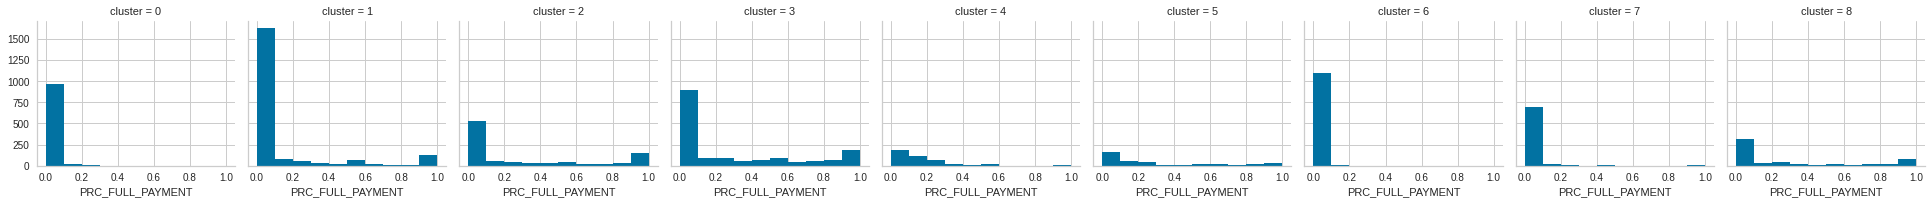

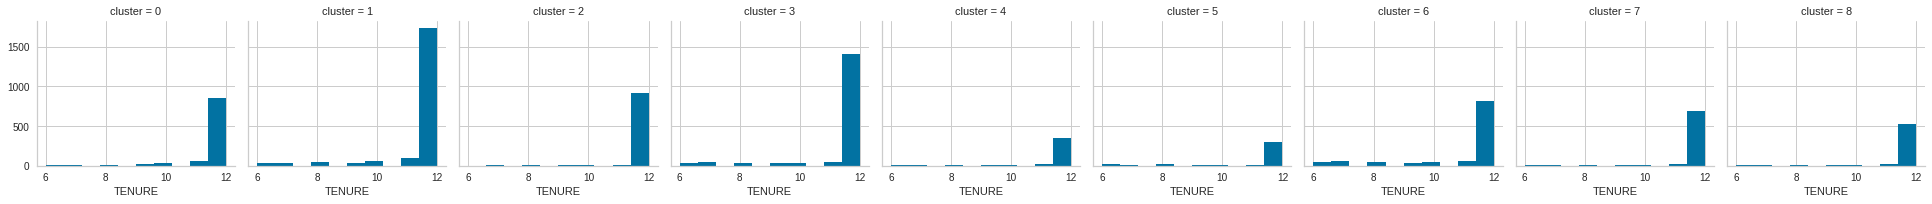

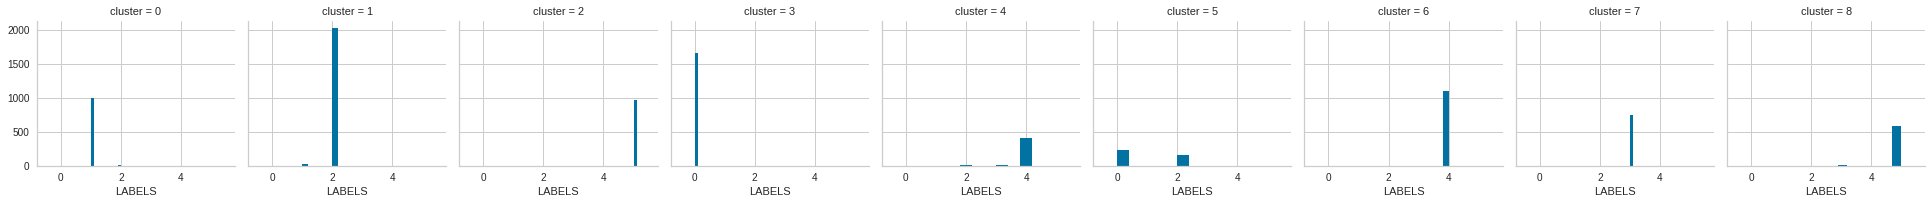

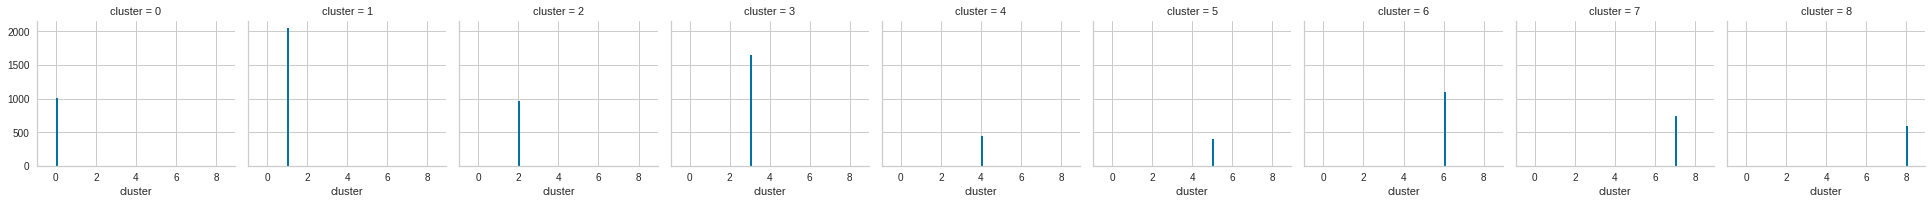

In [ ]:
for c in clusters_all_data:
    grid= sns.FacetGrid(clusters_all_data, col='cluster')
    grid.map(plt.hist, c)

#### Visualization of Clusters

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
dist = 1 - cosine_similarity(std_imp_data)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

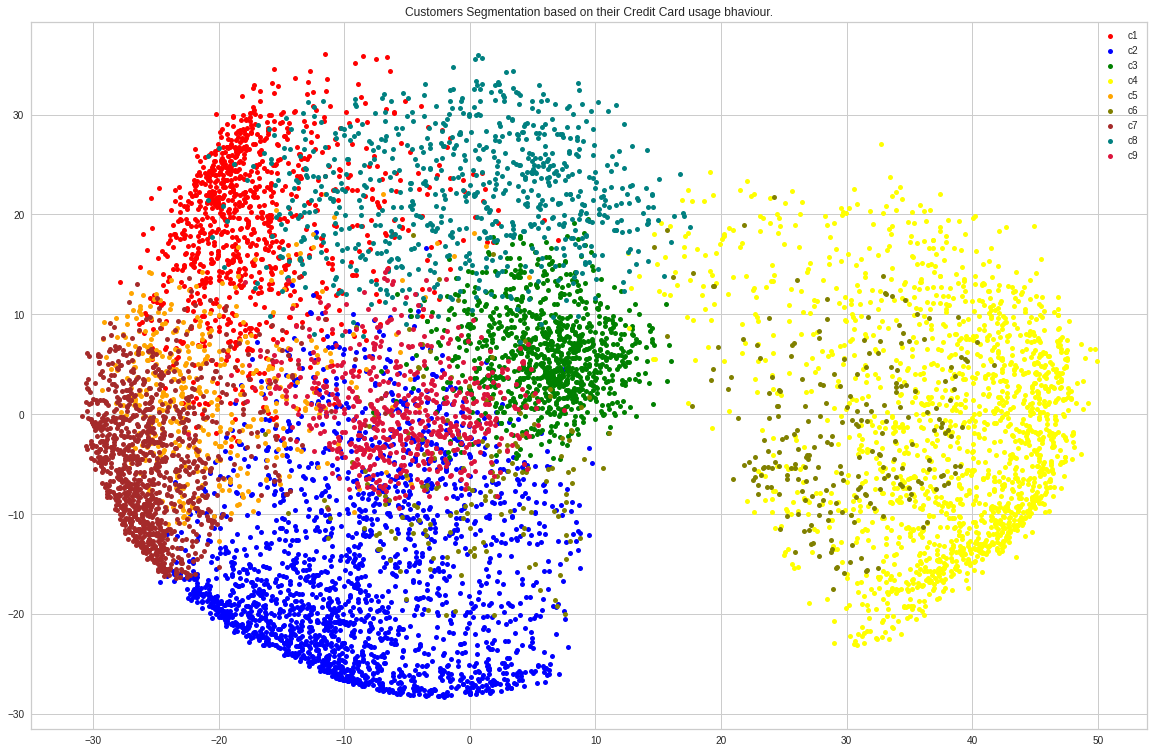

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'olive',
          6:'brown',
          7:'teal',
          8:'crimson',
          }
names = {0: 'c1', 
         1: 'c2', 
         2: 'c3', 
         3: 'c4', 
         4: 'c5',
         5:'c6',
         6:'c7',
         7:'c8',
         8:'c9'
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

# Project 2: Dimention Reduction using PCA
K-means, DBSCAN and agglomerative clustering, all use the Euclidean distance, which starts to lose its meaning when the number of dimensions starts increasing. so, before using these methods, i am going to reduce the data dimension by using PCA

In [64]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(std_imp_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(std_imp_data), columns=PC_names)


In [65]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.370538,-2.956302,-0.511717,0.635254,0.535559,2.196415,0.139621,-0.953313,0.641607,-0.111114
1,-2.375780,2.422468,0.427458,2.051207,3.329351,-0.916930,1.083163,-0.621258,-0.867379,-0.084420
2,1.280967,0.496200,-2.423188,-0.869154,-0.185923,0.496644,0.466305,1.847866,-0.497804,-0.730615
3,-1.087404,0.044465,-1.891897,-1.253547,0.489600,0.458251,0.399409,0.457305,0.834810,1.040906
4,-1.613767,-2.232706,-1.095930,-0.661469,-0.124270,-0.286132,-0.048982,-0.630105,-0.122245,-0.191578
...,...,...,...,...,...,...,...,...,...,...
8945,0.944305,-2.067386,2.328589,-0.500177,-0.620813,-0.138718,-0.176467,0.484731,-0.668957,-0.154451
8946,0.809901,-1.531892,2.310258,-1.223054,-0.494402,0.092383,0.474701,0.284228,-0.691522,-0.146608
8947,0.498223,-2.649470,2.447591,2.361448,1.443617,0.576582,2.029422,1.024701,0.141552,-0.279057
8948,-2.121505,-2.726678,-0.182214,3.000592,1.075159,0.266744,1.847370,-0.176192,1.470152,-0.028301


# Elbow Method

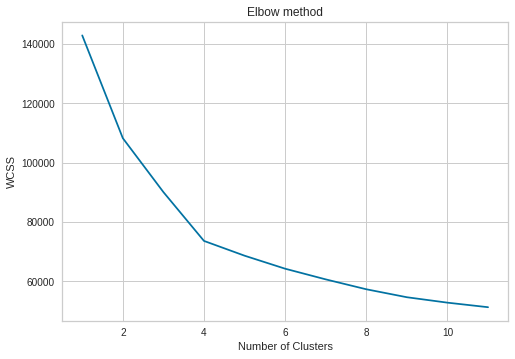

In [66]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(pca_data) for k in range (1, 12)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 12), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()       # Fit the data to the visualizer 

## Model: KMeans()

In [67]:
km_model_2 = KMeans(n_clusters=4)
labels = km_model_2.fit_predict(pca_data)

# Evaluate the Model

- The Davis-Bouldin Index is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.

- The Silhouette Coefficient is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.

In [68]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.3518270177720755
Silhouette Score = 0.2822381618793049


In [69]:
df_1['LABELS'] = labels # orginal data 
std_imp_data['LABELS'] = labels # normalized data
pca_data['LABELS'] = labels    # data after applying pca

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f91c883efd0>,
                     model=None)

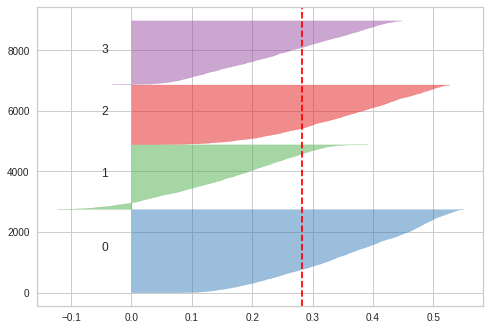

In [70]:
visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(pca_data.drop(['LABELS'],axis=1))


In [71]:
centroids = km_model.cluster_centers_

In [73]:
df_pca=pd.DataFrame(pca_data)
df_pca.head(50)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,LABELS
0,-1.370538,-2.956302,-0.511717,0.635254,0.535559,2.196415,0.139621,-0.953313,0.641607,-0.111114,3
1,-2.375780,2.422468,0.427458,2.051207,3.329351,-0.916930,1.083163,-0.621258,-0.867379,-0.084420,0
2,1.280967,0.496200,-2.423188,-0.869154,-0.185923,0.496644,0.466305,1.847866,-0.497804,-0.730615,2
3,-1.087404,0.044465,-1.891897,-1.253547,0.489600,0.458251,0.399409,0.457305,0.834810,1.040906,3
4,-1.613767,-2.232706,-1.095930,-0.661469,-0.124270,-0.286132,-0.048982,-0.630105,-0.122245,-0.191578,3
5,1.132936,0.138538,1.733769,-1.636009,0.384994,0.117710,0.816405,-0.771453,-0.940798,0.864890,1
6,4.012400,0.865578,-0.409351,-0.338834,1.388918,-0.539843,-2.257722,0.168493,1.252736,-0.855306,2
7,1.391993,-0.646309,2.364621,-1.499486,-0.052417,0.073688,0.314460,0.109321,-0.381914,-0.107060,1
8,0.206247,-0.939909,-1.822910,-0.655919,0.182283,-0.015974,-0.571478,0.444343,0.442863,1.236001,3
9,0.477981,-0.601398,-3.417965,0.214164,0.355711,0.081347,-1.386221,1.611224,-0.286574,2.177841,3


### Clusters visualization

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
dist = 1 - cosine_similarity(pca_data)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

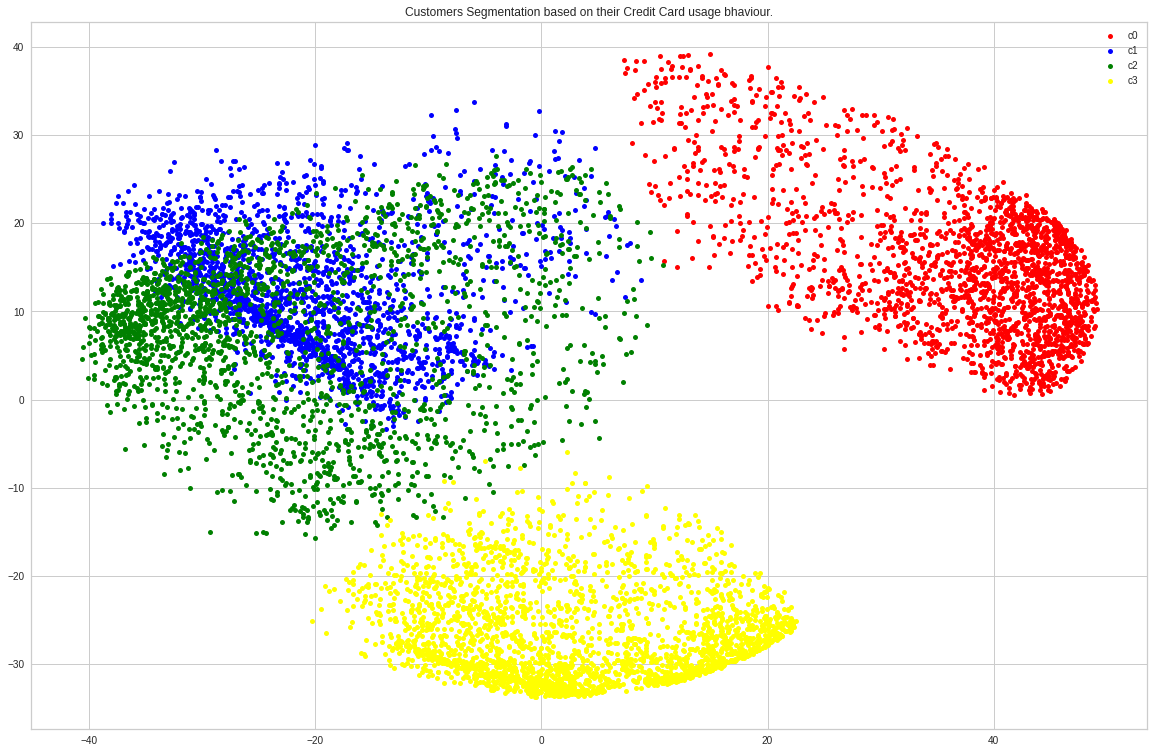

In [75]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
               
          }
names = {0: "c0", 
         1: 'c1', 
         2: 'c2', 
         3: 'c3', 
       
         }
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()